In [20]:
import numpy as np
import time
import os
import timeit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans


In [34]:

def kmeans_clustering(data,label_column,label_name,date_column, num_clusters,band_name):
    """
    Perform KMeans clustering on the given data.
    
    Parameters:
    - data (DataFrame): The data to cluster. (format: .csv)
    - label_column: the name of label column (format: str)
    - label_name: label name which we want to choice(format: str)
    - date_column: the column which contain dates (format: [begin(int), end(int)])
    - num_clusters (int): The number of clusters.
    - band_name: the names of band (str)
    
    Returns:
    - labels (array): Cluster labels for each data point.
    - centers (array): Coordinates of cluster centers.
    - percentage (function): Function to calculate the percentage of points in each cluster.
    
    """

    df = pd.read_csv(data)

    ### its select the data of specific label
    df_iran = df[df[label_column].isin([label_name])]
    df_iran = df_iran[df_iran.columns[date_column[0]:date_column[1]]]
    data = df_iran.fillna(0).to_numpy()
    kmeans = KMeans(n_clusters=num_clusters, init='random', random_state=42).fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    percentage = lambda x: np.sum(labels == x) / data.shape[0] * 100

    plt.figure(figsize=(16, 8), dpi=80)
    ax = plt.axes()
    plt.xticks(rotation=45)
    #plt.title('The States and Iran samples plot')
    plt.xlabel('Dates')
    plt.ylabel(band_name)
    for i in range(num_clusters):
        plt.plot(df_iran.columns[:],centers[i],label=f"Cluster {i}")
    plt.legend(loc="upper left")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(8))
  
    return labels, centers, percentage




In [35]:
data = r'C:\Users\HA\Desktop\e\RS\sattelate\Cluster\HAMEDAN_S1_50pe1.csv'
label_column = "Name"
label_name = "PO"
date_column = [1,-4]
num_clusters = 3
band_name = "NDVI"


c:\Users\HA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


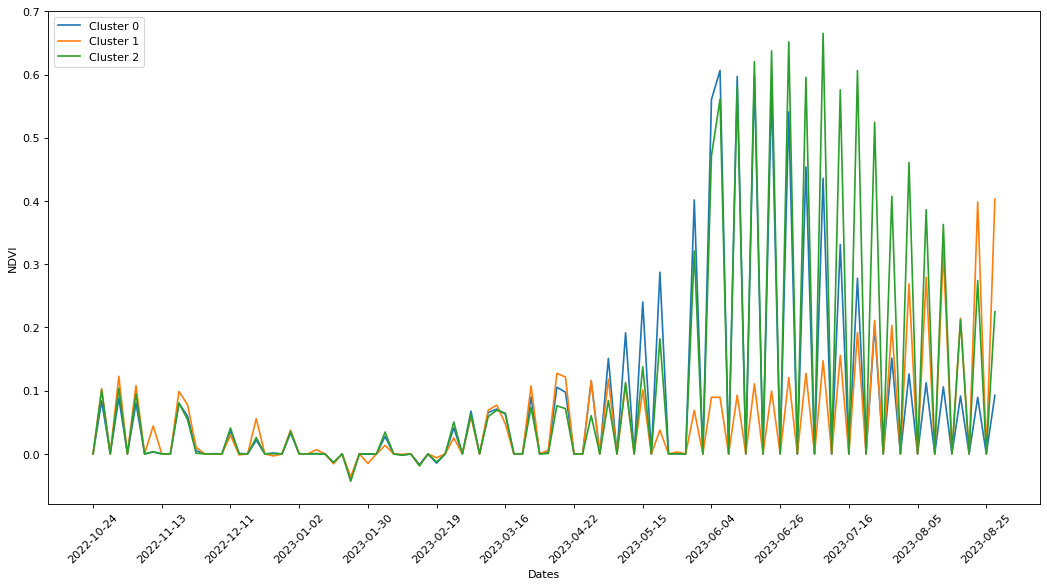

In [36]:
labels, centers, percentage = kmeans_clustering(data,label_column,label_name,date_column, num_clusters,band_name)

In [14]:
print(len(labels[labels == 3]))

0
